In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

In [97]:
def guessCritPt(x_l,y_l):
    mid_pt = np.max(y_l)/2
    mid_idx = np.argmin(np.abs(y_l-mid_pt))
    return x_l[mid_idx] - y_l[mid_idx]*(x_l[mid_idx+1]-x_l[mid_idx-1])/(y_l[mid_idx+1]-y_l[mid_idx-1])

def finiteScaling(x_l,y_l,ct_pt,nu,beta,max_size):
    # return (x_l-ct_pt)*(max_size**(1/nu)), y_l*(max_size**(2*beta/nu))
    return (x_l-ct_pt)*(max_size**(1/nu))*(max_size**(-2*beta/nu)), y_l

def finiteScalingCost(param,x_arr,y_arr,max_size_l,num_interp):
    # ct_pt = param[0]
    # nu = param[1]
    # beta = param[2]

    ct_pt = 1
    nu = param[0]
    beta = param[1]
    
    n_exp = x_arr.shape[0]

    target_x, target_y = finiteScaling(x_arr[0,:],y_arr[0,:],ct_pt,nu,beta,max_size_l[0])
    
    cost = 0
    for i in range(1,n_exp):
        # for j in range(i+1,n_exp):
        # target_x, target_y = finiteScaling(x_arr[j,:],y_arr[j,:],ct_pt,nu,beta,max_size_l[j])
        scaled_x, scaled_y = finiteScaling(x_arr[i,:],y_arr[i,:],ct_pt,nu,beta,max_size_l[i])
        # interp_x = np.linspace(scaled_x[0],scaled_x[-1],num_interp)
        interp_x = np.linspace(target_x[0],target_x[-1],num_interp)
        interp_y = np.interp(interp_x,scaled_x,scaled_y)
        interp_target_y = np.interp(interp_x,target_x,target_y)
        cost = cost + np.linalg.norm(interp_target_y-interp_y)
    
    return cost

def finiteScalingCB(param):
    print(param)

### Toric Code
horizontal, scale dy, poke hole, scaling analysis

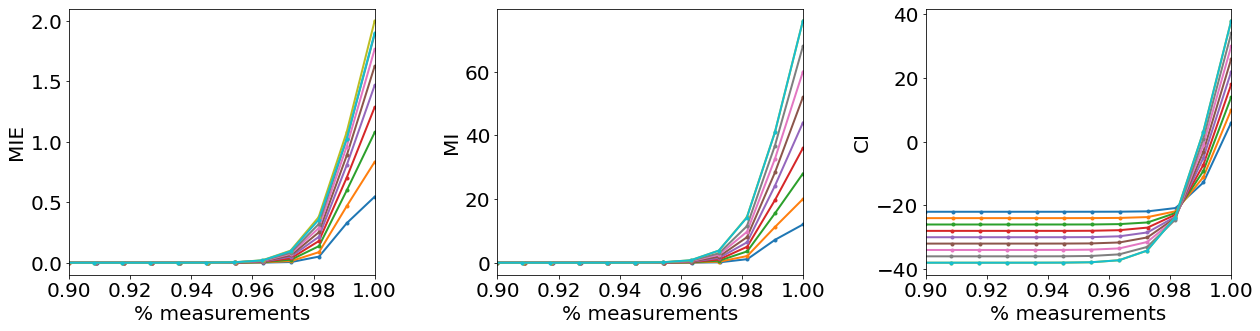

In [190]:
plt.rcParams["figure.figsize"] = (18,5)
idx_start = 0
for i in range(9,10):
    for j in range(1,11):
            id = idx_start + 10*(j-1)+i
            raw = np.load("../data/230419/230419_n%d_pp.npz"%(id))
            n_meas_l = raw['n_meas_l']
            cmi_l = raw['cmi_l']
            mi_l = raw['mi_l']
            ci_l = raw['ci_l']

            max_cmi = 2*(10+j)
            max_nmeas = n_meas_l[-1]
            # max_nmeas = 20*(10+10*i)

            plt.subplot(1,3,1)
            plt.plot(n_meas_l/max_nmeas,cmi_l/max_cmi,'.-')
            plt.subplot(1,3,2)
            plt.plot(n_meas_l/max_nmeas,mi_l,'.-')
            plt.subplot(1,3,3)
            plt.plot(n_meas_l/max_nmeas,ci_l,'.-')

xmin = 0.9
plt.subplot(1,3,1)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MIE")
plt.subplot(1,3,2)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MI")
plt.subplot(1,3,3)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("CI")
plt.tight_layout()

### Cluster State
horizontal, scale dy, poke hole, scaling analysis

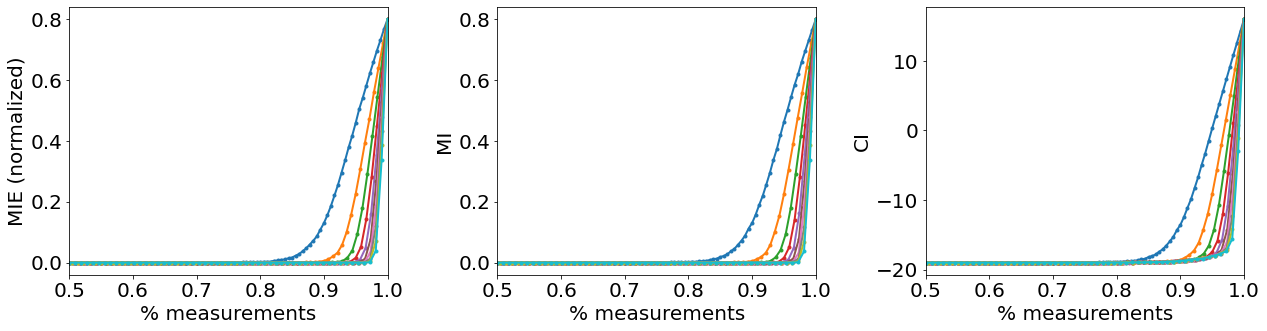

In [332]:
plt.rcParams["figure.figsize"] = (18,5)
idx_start = 300
for i in range(1,11):
    for j in range(10,11):
            id = idx_start + 10*(j-1)+i
            raw = np.load("../data/230419/230419_n%d_pp.npz"%(id))
            n_meas_l = raw['n_meas_l']
            cmi_l = raw['cmi_l']
            mi_l = raw['mi_l']
            ci_l = raw['ci_l']

            max_cmi = 2*(10+j)
            max_nmeas = n_meas_l[-1]
            # max_nmeas = 20*(10+10*i)

            plt.subplot(1,3,1)
            plt.plot(n_meas_l/max_nmeas,cmi_l/max_cmi,'.-')
            plt.subplot(1,3,2)
            plt.plot(n_meas_l/max_nmeas,mi_l/max_cmi,'.-')
            plt.subplot(1,3,3)
            plt.plot(n_meas_l/max_nmeas,ci_l,'.-')

xmin = 0.5
plt.subplot(1,3,1)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MIE (normalized)")
plt.subplot(1,3,2)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MI")
plt.subplot(1,3,3)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("CI")
plt.tight_layout()

      fun: 977.5896854739927
 hess_inv: array([[1.59972824e-03, 3.55265158e-04],
       [3.55265158e-04, 9.66949410e-05]])
      jac: array([7.62939453e-06, 4.50134277e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 48
      nit: 5
     njev: 16
   status: 2
  success: False
        x: array([1.61570267, 0.86815166])


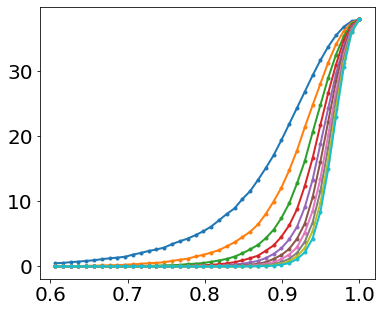

In [102]:
plt.rcParams["figure.figsize"] = (6,5)
idx_start = 200
for i in range(1,11):
    for j in range(10,11):
        id = idx_start + 10*(j-1)+i
        raw = np.load("../data/230419/230419_n%d_pp.npz"%(id))
        n_meas_l = raw['n_meas_l']
        cmi_l = raw['cmi_l']
        mi_l = raw['mi_l']
        ci_l = raw['ci_l']
        max_meas = n_meas_l[-1]
        # max_meas = 20*(10+10*i)
        n_meas_l = n_meas_l/max_meas

        resample_meas = np.linspace(0,1,100)
        resample_cmi = np.interp(resample_meas,n_meas_l,cmi_l)
        cutoff = 60
        plt.plot(resample_meas[cutoff:],resample_cmi[cutoff:],'.-')

        if i == 1:
            n_meas_arr = resample_meas[cutoff:]
            cmi_arr = resample_cmi[cutoff:]
            max_meas_l = np.array([max_meas])
        else:
            n_meas_arr = np.vstack((n_meas_arr,resample_meas[cutoff:]))
            cmi_arr = np.vstack((cmi_arr,resample_cmi[cutoff:]))
            max_meas_l = np.append(max_meas_l,cutoff)

        num_interp = 1000
        p0 = (1.4,0.1)

res = minimize(finiteScalingCost, p0, args=(n_meas_arr,cmi_arr,max_meas_l,num_interp),method='BFGS',tol=1e-5)
pf = res.x
print(res)

(-20.0, 0.0)

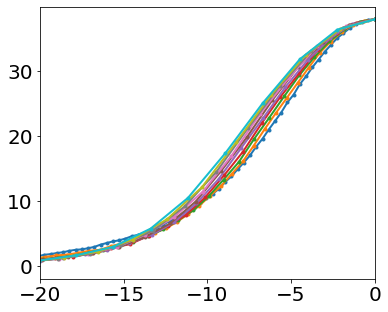

In [94]:
# ct_pt = pf[0]
ct_pt = 1
nu = pf[0]
nu = 1.4
beta = pf[1]
beta = 0

plt.rcParams["figure.figsize"] = (6,5)
for i in range(1,11):
    for j in range(10,11):
        id = idx_start + 10*(j-1)+i
        raw = np.load("../data/230419/230419_n%d_pp.npz"%(id))
        n_meas_l = raw['n_meas_l']
        cmi_l = raw['cmi_l']
        mi_l = raw['mi_l']
        ci_l = raw['ci_l']
        max_meas = n_meas_l[-1]
        # max_meas = 20*(10+10*i)
        n_meas_l = n_meas_l/max_meas
        scaled_meas, scaled_cmi = finiteScaling(n_meas_l,cmi_l,ct_pt,nu,beta,max_meas)
        plt.plot(scaled_meas,scaled_cmi,'.-')

plt.xlim([-20,0])

### XZZX
scale dy, poke hole, scaling anaylsis

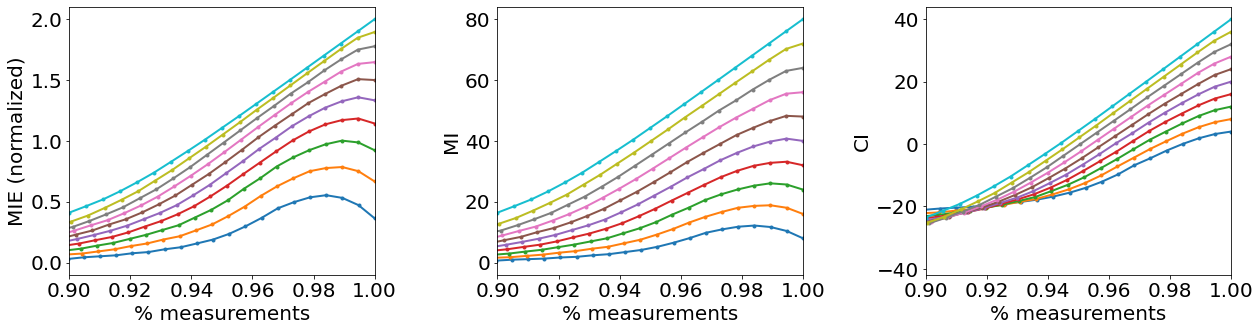

In [11]:
plt.rcParams["figure.figsize"] = (18,5)
idx_start = 400
for i in range(1,2):
    for j in range(1,11):
            id = idx_start + 10*(j-1)+i
            raw = np.load("../data/230419/230419_n%d_pp.npz"%(id))
            n_meas_l = raw['n_meas_l']
            cmi_l = raw['cmi_l']
            mi_l = raw['mi_l']
            ci_l = raw['ci_l']

            max_cmi = 2*(10+j)
            max_nmeas = n_meas_l[-1]
            # max_nmeas = 20*(10+10*i)

            plt.subplot(1,3,1)
            plt.plot(n_meas_l/max_nmeas,cmi_l/max_cmi,'.-')
            plt.subplot(1,3,2)
            plt.plot(n_meas_l/max_nmeas,mi_l,'.-')
            plt.subplot(1,3,3)
            plt.plot(n_meas_l/max_nmeas,ci_l,'.-')

xmin = 0.9
plt.subplot(1,3,1)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MIE (normalized)")
plt.subplot(1,3,2)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MI")
plt.subplot(1,3,3)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("CI")
plt.tight_layout()

### Toric Code
scaling both dx, dy, scaling analysis

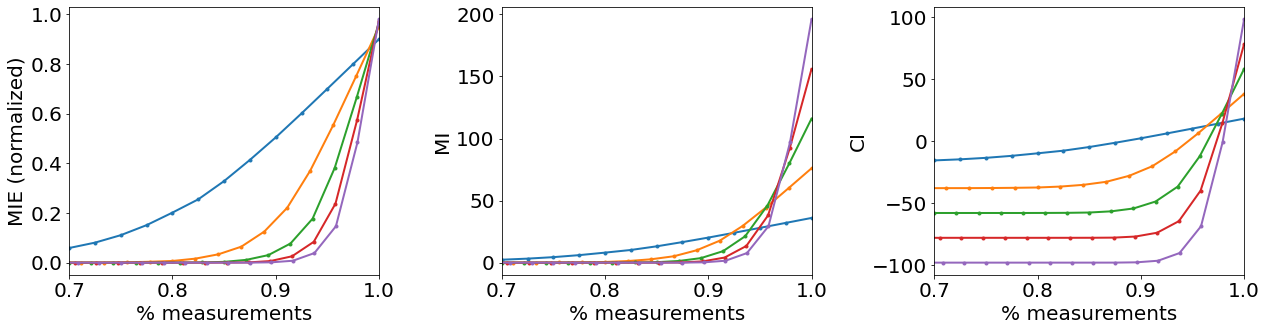

In [16]:
plt.rcParams["figure.figsize"] = (18,5)
idx_start = 600
for i in range(1,6):
    for j in range(5,6):
            id = idx_start + 5*(j-1)+i
            raw = np.load("../data/230419/230419_n%d_pp.npz"%(id))
            n_meas_l = raw['n_meas_l']
            cmi_l = raw['cmi_l']
            mi_l = raw['mi_l']
            ci_l = raw['ci_l']

            max_cmi = 4*(5*i+i*j)
            plt.subplot(1,3,1)
            plt.plot(n_meas_l/n_meas_l[-1],cmi_l/max_cmi,'.-')
            plt.subplot(1,3,2)
            plt.plot(n_meas_l/n_meas_l[-1],mi_l,'.-')
            plt.subplot(1,3,3)
            plt.plot(n_meas_l/n_meas_l[-1],ci_l,'.-')

xmin = 0.7
plt.subplot(1,3,1)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MIE (normalized)")
plt.subplot(1,3,2)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MI")
plt.subplot(1,3,3)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("CI")
plt.tight_layout()

### Cluster
scaling both dx, dy, scaling analysis

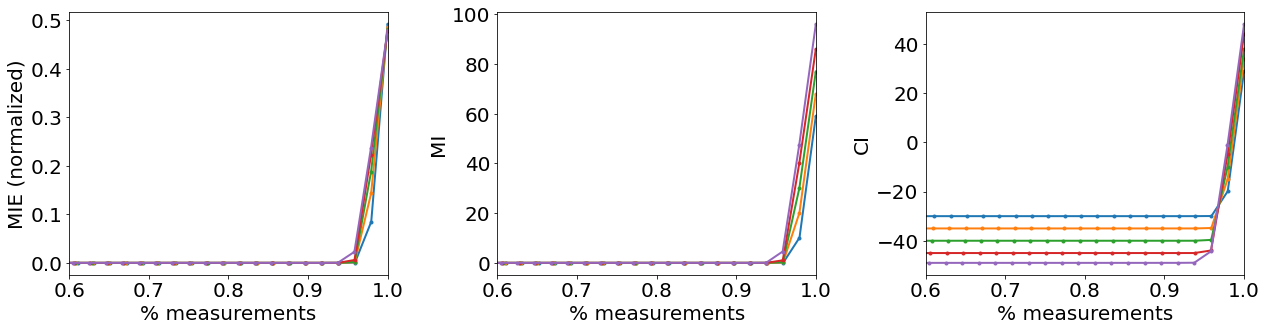

In [247]:
plt.rcParams["figure.figsize"] = (18,5)
idx_start = 650
for i in range(5,6):
    for j in range(1,2):
            id = idx_start + 5*(j-1)+i
            raw = np.load("../data/230419/230419_n%d_pp.npz"%(id))
            n_meas_l = raw['n_meas_l']
            cmi_l = raw['cmi_l']
            mi_l = raw['mi_l']
            ci_l = raw['ci_l']

            max_cmi = 4*(5*i+i*j)
            plt.subplot(1,3,1)
            plt.plot(n_meas_l/n_meas_l[-1],cmi_l/max_cmi,'.-')
            plt.subplot(1,3,2)
            plt.plot(n_meas_l/n_meas_l[-1],mi_l,'.-')
            plt.subplot(1,3,3)
            plt.plot(n_meas_l/n_meas_l[-1],ci_l,'.-')

xmin = 0.6
plt.subplot(1,3,1)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MIE (normalized)")
plt.subplot(1,3,2)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MI")
plt.subplot(1,3,3)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("CI")
plt.tight_layout()

### XZZX
scaling both dx, dy, scaling analysis

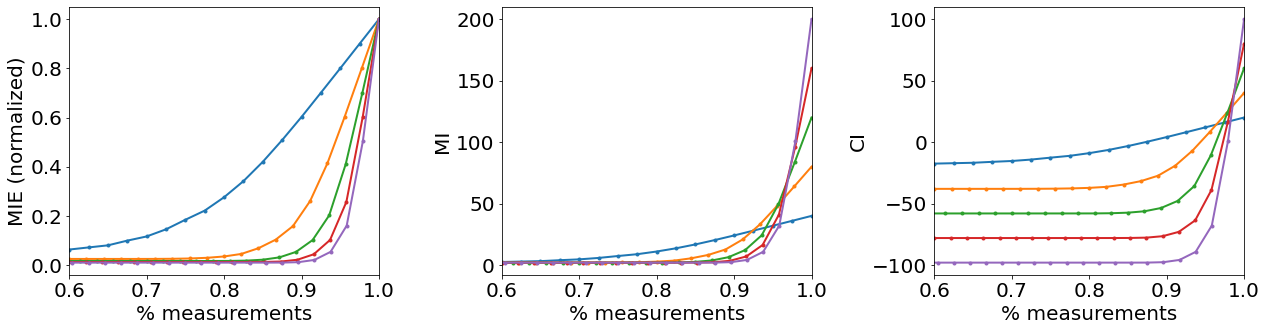

In [253]:
plt.rcParams["figure.figsize"] = (18,5)
idx_start = 700
for i in range(1,6):
    for j in range(5,6):
            id = idx_start + 5*(j-1)+i
            raw = np.load("../data/230419/230419_n%d_pp.npz"%(id))
            n_meas_l = raw['n_meas_l']
            cmi_l = raw['cmi_l']
            mi_l = raw['mi_l']
            ci_l = raw['ci_l']

            max_cmi = 4*(5*i+i*j)
            plt.subplot(1,3,1)
            plt.plot(n_meas_l/n_meas_l[-1],cmi_l/max_cmi,'.-')
            plt.subplot(1,3,2)
            plt.plot(n_meas_l/n_meas_l[-1],mi_l,'.-')
            plt.subplot(1,3,3)
            plt.plot(n_meas_l/n_meas_l[-1],ci_l,'.-')

xmin = 0.6
plt.subplot(1,3,1)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MIE (normalized)")
plt.subplot(1,3,2)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MI")
plt.subplot(1,3,3)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("CI")
plt.tight_layout()

### Toric Code
scale dx, poke hole

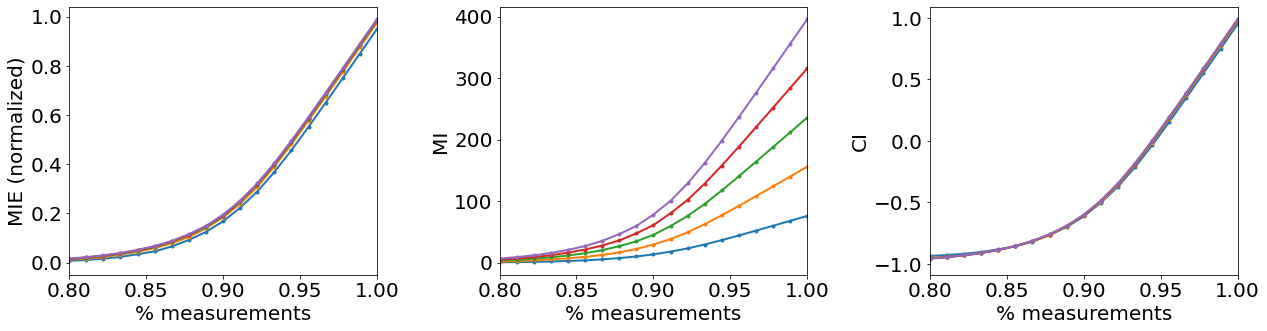

In [290]:
plt.rcParams["figure.figsize"] = (18,5)
idx_start = 750
for i in range(1,6):
    for j in range(5,6):
            id = idx_start + 5*(j-1)+i
            raw = np.load("../data/230419/230419_n%d_pp.npz"%(id))
            n_meas_l = raw['n_meas_l']
            cmi_l = raw['cmi_l']
            mi_l = raw['mi_l']
            ci_l = raw['ci_l']

            max_cmi = 4*4*i*j
            max_ci = 2*4*i*j
            plt.subplot(1,3,1)
            plt.plot(n_meas_l/n_meas_l[-1],cmi_l/max_cmi,'.-')
            plt.subplot(1,3,2)
            plt.plot(n_meas_l/n_meas_l[-1],mi_l,'.-')
            plt.subplot(1,3,3)
            plt.plot(n_meas_l/n_meas_l[-1],ci_l/max_ci,'.-')

xmin = 0.8
plt.subplot(1,3,1)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MIE (normalized)")
plt.subplot(1,3,2)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MI")
plt.subplot(1,3,3)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("CI")
plt.tight_layout()

### Cluster State
scale dx, poke hole

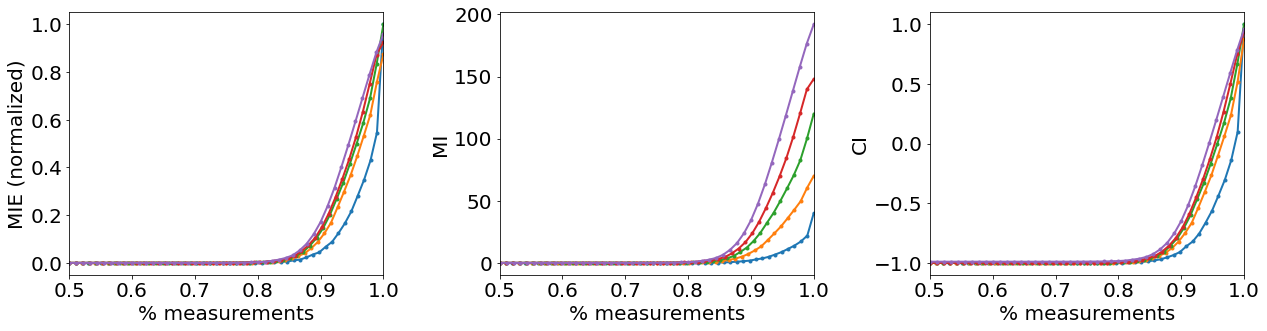

In [278]:
plt.rcParams["figure.figsize"] = (18,5)
idx_start = 825
for i in range(5,6):
    for j in range(1,6):
            id = idx_start + 5*(j-1)+i
            raw = np.load("../data/230419/230419_n%d_pp.npz"%(id))
            n_meas_l = raw['n_meas_l']
            cmi_l = raw['cmi_l']
            mi_l = raw['mi_l']
            ci_l = raw['ci_l']

            max_cmi = 2*4*i*j
            max_ci = 1*4*i*j
            plt.subplot(1,3,1)
            plt.plot(n_meas_l/n_meas_l[-1],cmi_l/max_cmi,'.-')
            plt.subplot(1,3,2)
            plt.plot(n_meas_l/n_meas_l[-1],mi_l,'.-')
            plt.subplot(1,3,3)
            plt.plot(n_meas_l/n_meas_l[-1],ci_l/max_ci,'.-')

xmin = 0.5
plt.subplot(1,3,1)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MIE (normalized)")
plt.subplot(1,3,2)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MI")
plt.subplot(1,3,3)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("CI")
plt.tight_layout()

### XZZX
scale dx, poke hole

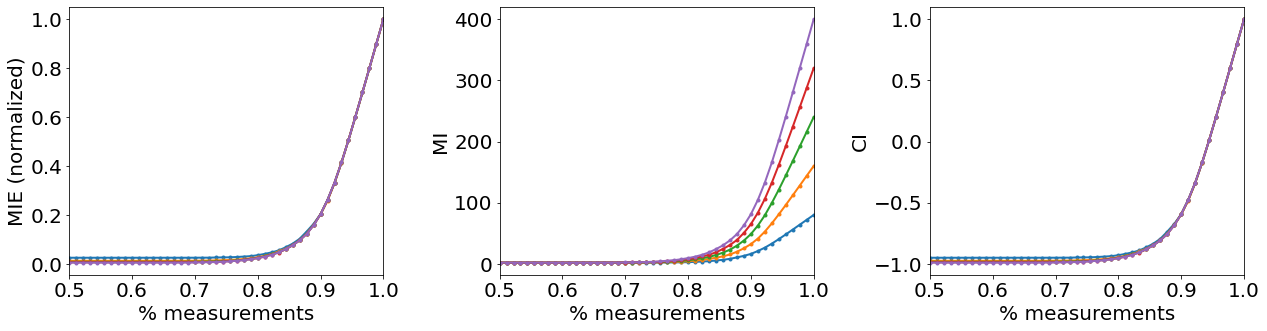

In [284]:
plt.rcParams["figure.figsize"] = (18,5)
idx_start = 850
for i in range(1,6):
    for j in range(5,6):
            id = idx_start + 5*(j-1)+i
            raw = np.load("../data/230419/230419_n%d_pp.npz"%(id))
            n_meas_l = raw['n_meas_l']
            cmi_l = raw['cmi_l']
            mi_l = raw['mi_l']
            ci_l = raw['ci_l']

            max_cmi = 4*4*i*j
            max_ci = 2*4*i*j
            plt.subplot(1,3,1)
            plt.plot(n_meas_l/n_meas_l[-1],cmi_l/max_cmi,'.-')
            plt.subplot(1,3,2)
            plt.plot(n_meas_l/n_meas_l[-1],mi_l,'.-')
            plt.subplot(1,3,3)
            plt.plot(n_meas_l/n_meas_l[-1],ci_l/max_ci,'.-')

xmin = 0.5
plt.subplot(1,3,1)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MIE (normalized)")
plt.subplot(1,3,2)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("MI")
plt.subplot(1,3,3)
plt.xlim([xmin,1])
plt.xlabel("% measurements")
plt.ylabel("CI")
plt.tight_layout()